In [1]:
# import numpy, pandas, seaborn, matplotlib just because
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import pickle

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Time series forecasting on approval ratings

In [2]:
df = pd.read_csv('president_approval_polls - adults 9-10-20 - since 1-2017 - b or better.csv')
df

,question_id,poll_id,state,politician_id,politician,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,start_date,end_date,sponsor_candidate,tracking,created_at,notes,url,source,yes,no
0,77265,49253,NaN,11,Donald Trump,169,Gallup,NaN,NaN,Gallup,...,1/20/17,1/22/17,NaN,True,2/6/17 17:42,NaN,http://www.gallup.com/poll/201617/gallup-daily...,538 | Huffpost,45.0,45.0
1,77274,49262,NaN,11,Donald Trump,169,Gallup,NaN,NaN,Gallup,...,1/21/17,1/23/17,NaN,True,2/6/17 17:48,NaN,http://www.gallup.com/poll/201617/gallup-daily...,538 | Huffpost,45.0,46.0
2,77248,49236,NaN,11,Donald Trump,169,Gallup,NaN,NaN,Gallup,...,1/22/17,1/24/17,NaN,True,2/6/17 17:40,NaN,http://www.gallup.com/poll/201617/gallup-daily...,538 | Huffpost,46.0,45.0
3,77599,49426,NaN,11,Donald Trump,744,Ipsos,71,Reuters,Ipsos,...,1/20/17,1/24/17,NaN,True,3/1/17 17:53,NaN,http://polling.reuters.com/#poll/CP3_2/,Huffpost | Reuters,42.1,45.2
4,77257,49245,NaN,11,Donald Trump,169,Gallup,NaN,NaN,Gallup,...,1/23/17,1/25/17,NaN,True,2/6/17 17:42,NaN,http://www.gallup.com/poll/201617/gallup-daily...,538 | Huffpost,46.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,128335,68553,NaN,11,Donald Trump,568,YouGov,352,Economist,YouGov,...,9/6/20,9/8/20,NaN,NaN,9/9/20 11:18,NaN,https://docs.cdn.yougov.com/8nwf5tw7g2/econTab...,538,42.0,54.0
3545,128295,68529,NaN,11,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,9/5/20,9/8/20,NaN,NaN,9/8/20 18:16,NaN,https://docs.cdn.yougov.com/56c1zo4in9/tabs_Tr...,538,43.0,50.0
3546,128378,68539,NaN,11,Donald Trump,744,Ipsos,71,Reuters,Ipsos,...,9/3/20,9/8/20,NaN,NaN,9/9/20 18:01,NaN,https://www.ipsos.com/sites/default/files/ct/n...,538,39.0,56.0
3547,128387,68567,NaN,11,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,9/7/20,9/9/20,NaN,NaN,9/9/20 18:58,NaN,https://docs.cdn.yougov.com/2hb49ax2ra/tabs_Tr...,538,40.0,55.0


In [3]:
# approval_ds.drop(['president','subgroup','modeldate','startdate','pollster','grade','samplesize','population','weight','influence','approve','disapprove',
#                   'adjusted_disapprove','multiversions','tracking','url','poll_id','question_id','createddate','timestamp'], axis=1, inplace=True)
df = df.loc[:, ['end_date','yes']]
df = df.rename(columns = {'end_date':'ds'})
df = df.rename(columns = {'yes':'y'})
df.head()

,ds,y
0,1/22/17,45.0
1,1/23/17,45.0
2,1/24/17,46.0
3,1/24/17,42.1
4,1/25/17,46.0


In [4]:
# adding cap and floor to current
df['cap'] = 50
df['floor'] = 31

## Modeling

In [5]:
model = Prophet(growth='logistic')
model.fit(df)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
df.tail()

,ds,y,cap,floor
3544,9/8/20,42.0,50,31
3545,9/8/20,43.0,50,31
3546,9/8/20,39.0,50,31
3547,9/9/20,40.0,50,31
3548,9/9/20,44.0,50,31


In [7]:
future = model.make_future_dataframe(periods=61)

# adding cap and floor to future
future['cap'] = 50
future['floor'] = 31

In [8]:
future.tail()

,ds,cap,floor
3605,2020-11-05,50,31
3606,2020-11-06,50,31
3607,2020-11-07,50,31
3608,2020-11-08,50,31
3609,2020-11-09,50,31


In [9]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3605,2020-11-05,41.550521,38.863798,44.440038
3606,2020-11-06,41.672895,38.929990,44.484294
3607,2020-11-07,41.695829,39.011146,44.393244
3608,2020-11-08,41.665237,38.759997,44.401185
3609,2020-11-09,41.804842,38.932745,44.296670


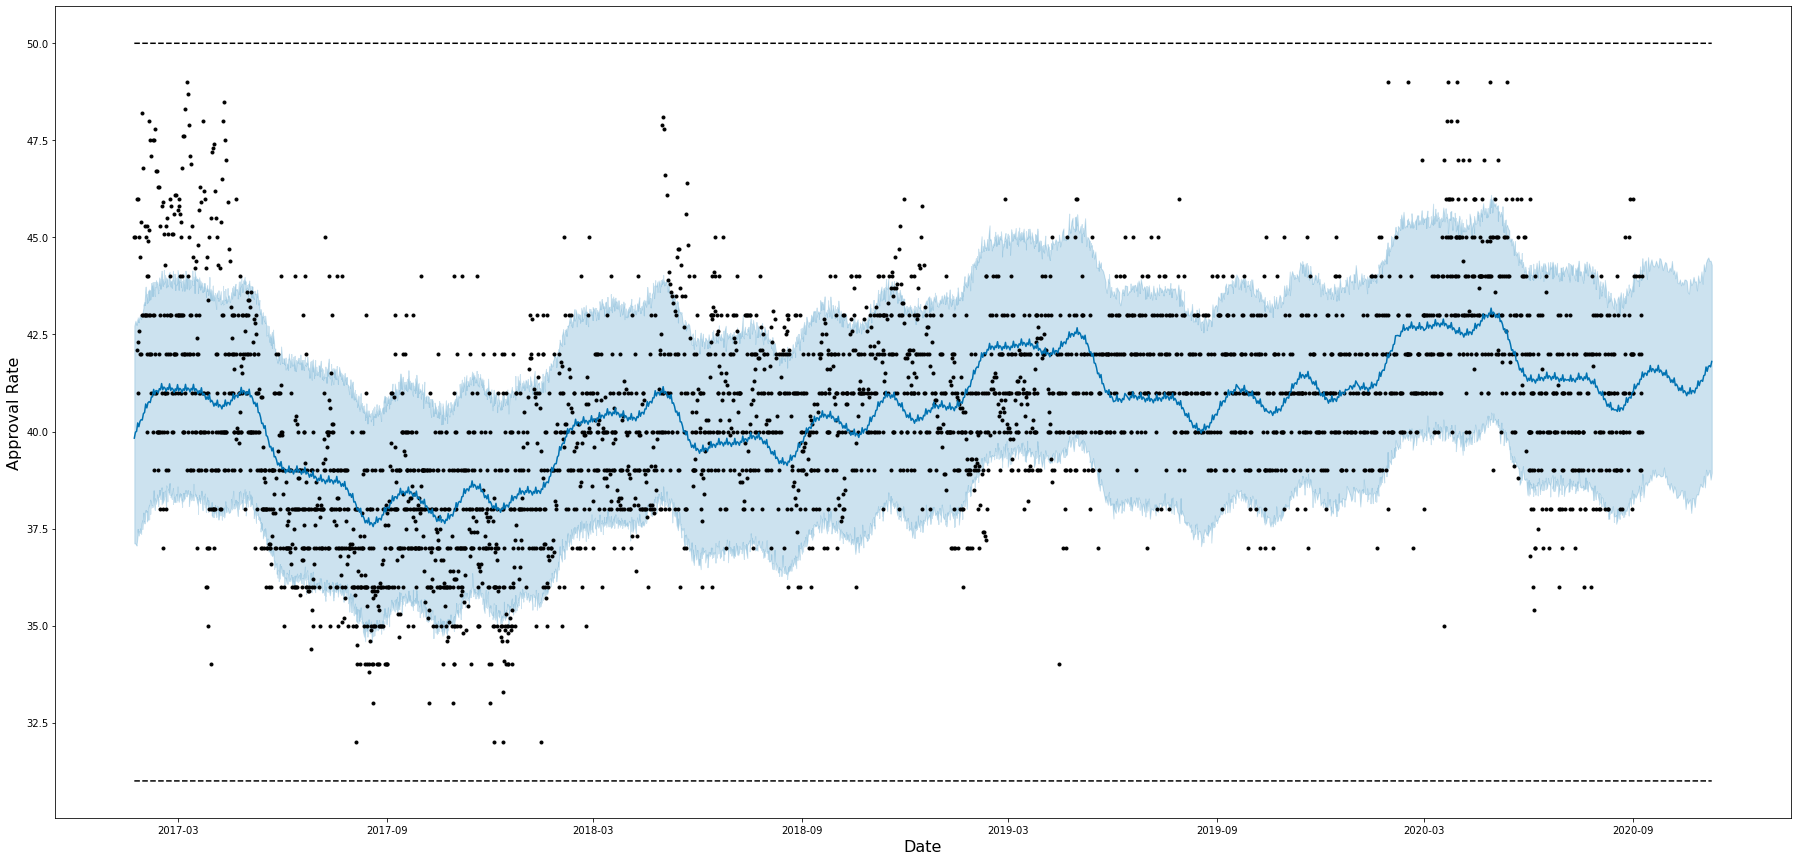

In [10]:
fig1 = model.plot(forecast, figsize=(25, 12))
# plt.title('US President Approval Forecast', fontsize = 30)
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Approval Rate', fontsize = 16)
plt.grid(b=None)

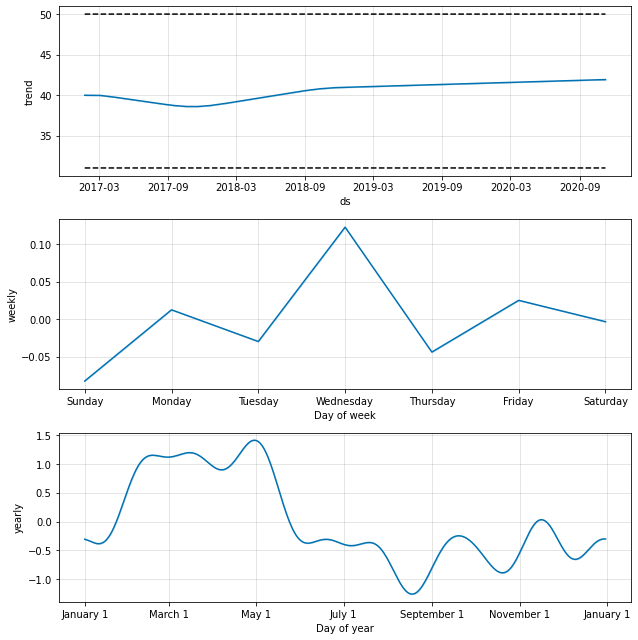

In [11]:
fig2 = model.plot_components(forecast)

Text(101.75, 0.5, 'Approval Rate')

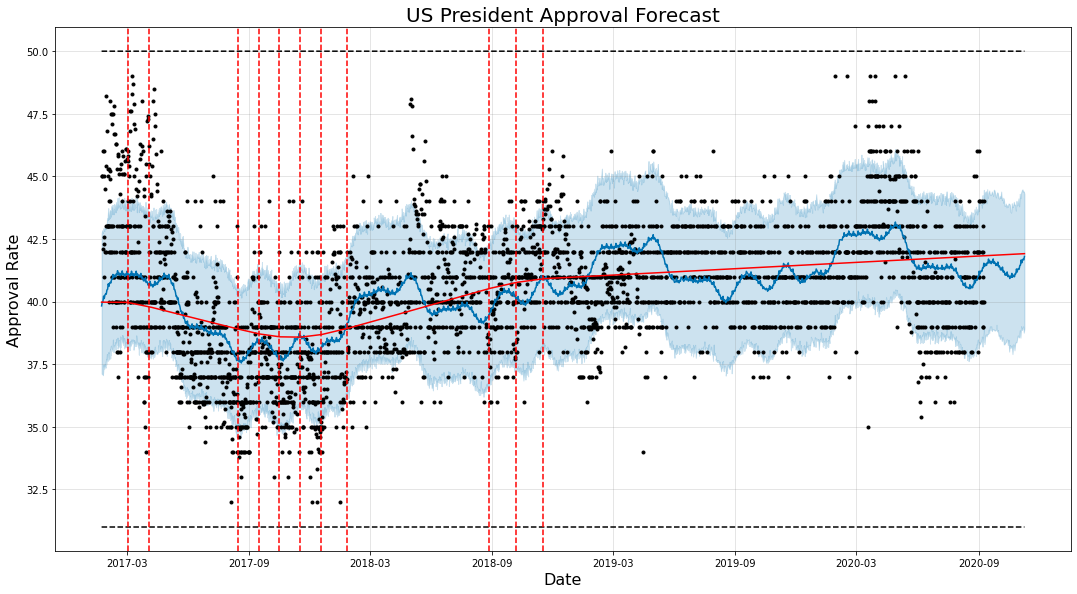

In [12]:
fig = model.plot(forecast, figsize=(15, 8))
a = add_changepoints_to_plot(fig.gca(), model, forecast)
plt.title('US President Approval Forecast', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Approval Rate', fontsize = 16)